In [1]:
import pandas as pd
import numpy as np
from IPython.display import Audio

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt


In [2]:
def load_csv_dataset():
    
    data = pd.read_csv('../data/features_30_sec.csv')
    classes = data[["label"]]
    features = data.drop(['filename', 'label'], axis=1)
    
    encoder = LabelEncoder()
    classes = encoder.fit_transform(classes.values.ravel())
    
    return features, classes

In [3]:
X, y = load_csv_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [5]:
path = '../data/images_original'

In [6]:
def load_image_dataset():
    
    imgs = keras.utils.image_dataset_from_directory(path, labels='inferred', color_mode='rgb', batch_size=1000)

    images = []
    labels = []
    for (i, l) in imgs.as_numpy_iterator():
        images = i / 255
        labels = l
        
    return images, labels

Found 999 files belonging to 10 classes.


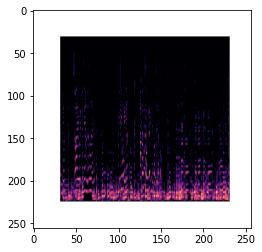

In [7]:
images, labels = load_image_dataset()
plt.imshow(images[0])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels)

In [9]:
Audio('../data/genres_original/hiphop/hiphop.00035.wav')